In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#import the dataset
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
#check for missing values
df.isna().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [6]:
#check the dimensions
df.shape

(12043, 23)

Exploratory Data Analysis and Visualization

In [8]:
#summary statistics
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


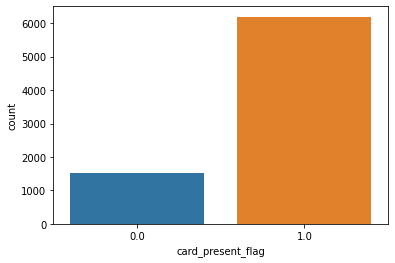

In [9]:
#ratio of cards issued
sns.countplot(df.card_present_flag);

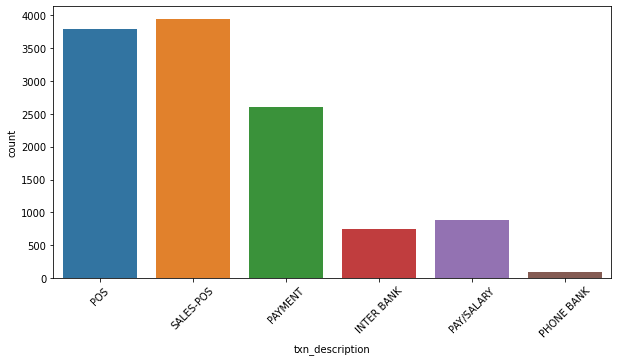

In [10]:
#transaction description
plt.figure(figsize = (10,5))
trans_plt = sns.countplot(data = df, x = 'txn_description')
trans_plt.set_xticklabels(trans_plt.get_xticklabels(), rotation=45);

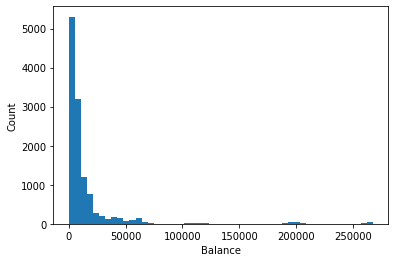

In [53]:
#Account balance
plt.hist(df.balance, bins = 50);
plt.xlabel('Balance');
plt.ylabel('Count');

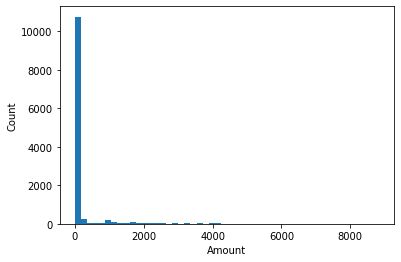

In [52]:
# Transaction Amount histogram
plt.hist(df.amount, bins = 50);
plt.xlabel('Amount');
plt.ylabel('Count');

In [54]:
#Average transaction Amount
df['amount'].mean()

187.93358797641767

In [55]:
#Average number of transactions per month
len(df)/3

4014.3333333333335

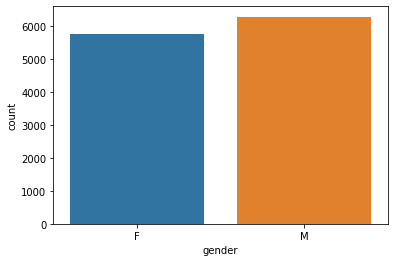

In [13]:
#Gender ratio
sns.countplot(data = df, x = 'gender');

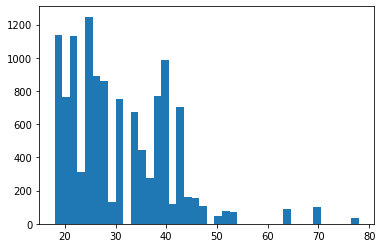

In [14]:
#Age histogram
plt.hist(df.age, bins = 40);

In [15]:
#Suburbs with highest number of merchants
df['merchant_suburb'].value_counts()

Melbourne        255
Sydney           233
Southport         82
Brisbane City     79
Chatswood         55
                ... 
Glenorchy          1
Safety Bay         1
Officer            1
Glen Innes         1
Eastlakes          1
Name: merchant_suburb, Length: 1609, dtype: int64

In [17]:
#Suburbs with the highest transaction amounts
df.groupby('merchant_suburb')['amount'].sum().sort_values(ascending = False)[0:10]

merchant_suburb
Sydney            21675.44
Melbourne         11943.53
South Brisbane    11740.58
Mascot            10282.62
Mount Gambier      4710.25
Malvern            3994.83
Maribyrnong        3770.83
Parap              3323.51
Brisbane City      2724.45
Mount Gravatt      2721.14
Name: amount, dtype: float64

In [18]:
#Number of merchants per state
df['merchant_state'].value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

Text(0.5, 1.0, 'Transaction Movement (Credit/Debit)')

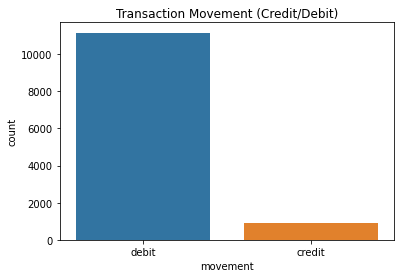

In [56]:
#Ratio of Credits to debits to credits
sns.countplot(data = df, x = df.movement)
plt.title("Transaction Movement (Credit/Debit)")

In [24]:
len(df[df['movement']=='credit'])/len(df)*100

7.33206011791082

In [25]:
#convert to date time format and extract the months, days, and years
df['date'] = pd.DatetimeIndex(df.date)
df['week_days'] = df['date'].apply(lambda x: x.strftime('%A'))
df['months'] = df['date'].apply(lambda x: x.strftime('%m'))
df['years'] = df['date'].apply(lambda x: x.strftime('%y'))

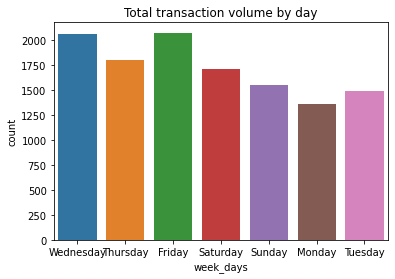

In [26]:
#Transaction Volume by day
sns.countplot(df.week_days);
plt.title('Total transaction volume by day');

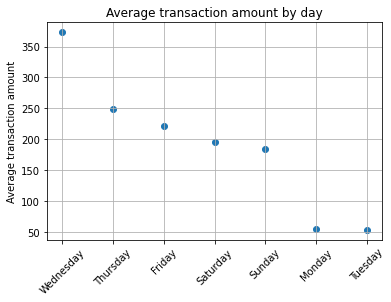

In [27]:
#Average transaction amount for each day
plt.scatter(df.week_days.unique(), df.groupby('week_days')['amount'].mean().sort_values(ascending = False));
plt.xticks(rotation = 45);
plt.ylabel('Average transaction amount');
plt.grid();
plt.title('Average transaction amount by day');

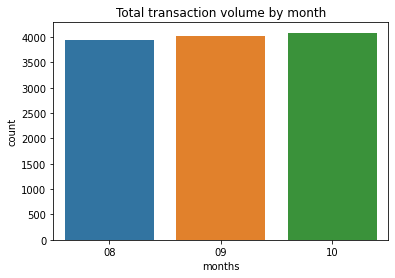

In [28]:
#Total transaction volume by month
sns.countplot(df.months)
plt.title("Total transaction volume by month");

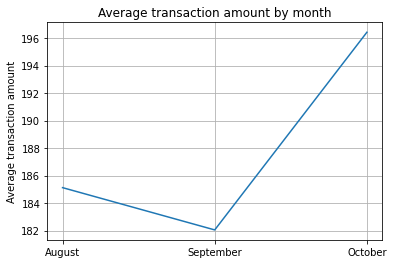

In [29]:
#Average transaction volume for each month
plt.plot(df.groupby('months')['amount'].mean());
plt.xticks([0,1,2], ['August', 'September', 'October']);
plt.ylabel('Average transaction amount');
plt.grid();
plt.title('Average transaction amount by month');

In [30]:
#Extract longitude and latitude values
long = [float(df.long_lat[j][8:]) for j in range(len(df))]
lat = [float(df.long_lat[j][0:6]) for j in range(len(df))]
df['long'] = long
df['lat'] = lat

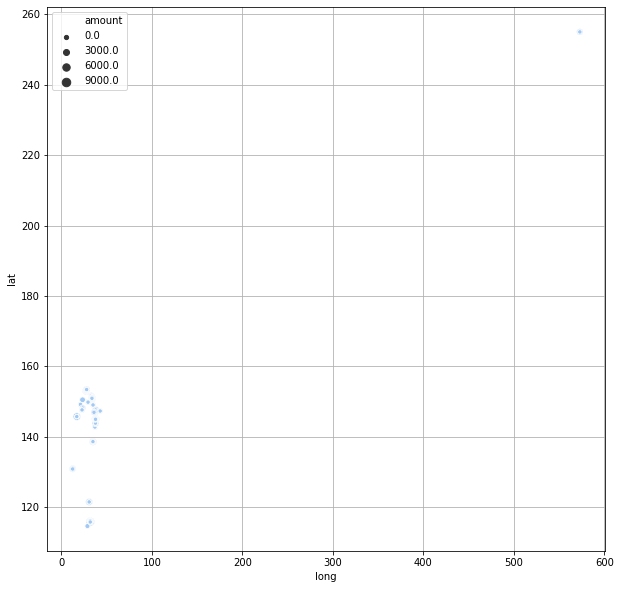

In [46]:
#plot transaction amount by location
plt.figure(figsize = (10,10))
sns.scatterplot(data = df, x = 'long', y = 'lat', size = 'amount')
plt.grid()

In [47]:
#transaction volume by location
df.groupby('long_lat')['amount'].count().sort_values(ascending = False)

long_lat
153.41 -27.95    578
151.23 -33.94    303
116.06 -32.00    292
145.45 -37.74    260
153.10 -27.66    259
                ... 
149.03 -35.25     40
149.19 -21.15     37
145.09 -37.82     34
130.98 -12.49     31
147.61 -37.82     25
Name: amount, Length: 100, dtype: int64

In [48]:
#highest transactions based on amounts
df.groupby('long_lat')['amount'].mean().sort_values(ascending = False)[0:21]

long_lat
130.98 -12.49    693.632903
153.02 -27.66    567.614500
115.83 -31.90    515.583846
149.83 -29.47    497.669474
144.66 -37.91    489.220980
148.16 -23.52    448.658413
147.61 -37.82    426.108800
116.02 -31.87    418.742468
149.19 -21.15    392.840811
144.96 -37.84    375.681089
149.03 -35.25    355.400250
115.81 -31.82    339.843700
144.98 -37.84    335.183673
151.18 -33.80    333.786596
145.09 -37.82    318.977941
151.27 -33.90    317.661765
145.01 -37.93    314.383571
151.23 -33.96    314.324298
115.79 -31.94    309.047903
144.96 -37.69    307.334318
143.88 -37.66    304.375604
Name: amount, dtype: float64